In [1]:
from tools.data_reader import *
from tools.neural_network_integrator import *
from tools.visualization import *
from tools.runge_kutta_method import *
from models.vae import *


%reload_ext autoreload
%autoreload 2

### VAE with four source


In [2]:
# data prepocessing
file_path = "data/postvis_four_sources_each500.traj"
columns, df_selected, train_data, val_data = data_reader(
    file_path, train_percentage=0.9, test_percentage=0.1
)
train_data.shape, val_data.shape, train_data[0, :, :]

startX-PID1     20.050923
endX-PID1       20.051391
simTime         16.400000
startY-PID1     36.597990
endY-PID1       35.970875
endTime-PID1    16.800000
Name: 5523, dtype: float64


((27195, 2, 3),
 (3022, 2, 3),
 array([[20.05092335, 20.05139059, 16.4       ],
        [36.59798997, 35.97087516, 16.8       ]]))

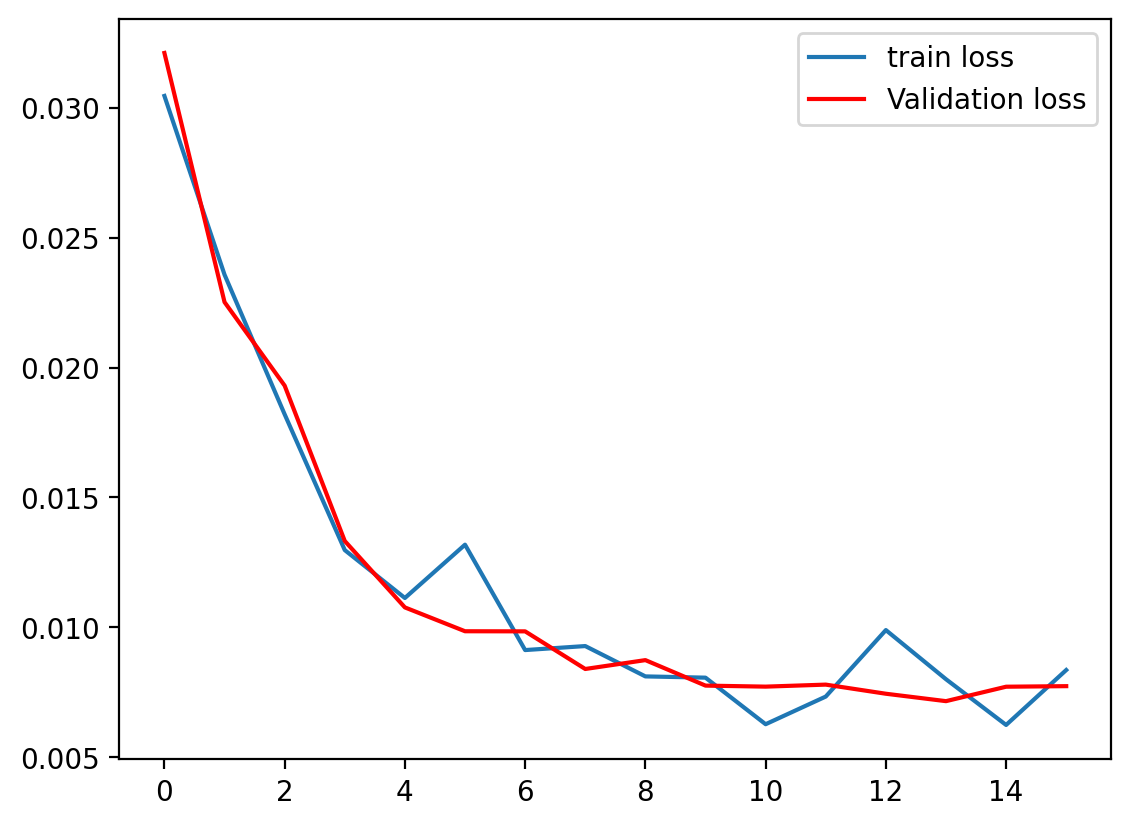

In [3]:
# parameters of neural network
lr = 0.0001
epochs = 200
batch_size = 256
width = 3
input_size = 2
output_size = 2
latent_dims = 2
# setup the model
model = VariationalAutoencoder(latent_dims, input_size, output_size)
# train the model
train_loss_data, val_loss_data = train(
    model,
    lr,
    epochs,
    train_data,
    val_data,
    batch_size,
    early_stopping_step=1,
    method="kutta",
)
plot_train_val_loss(train_loss_data, val_loss_data)

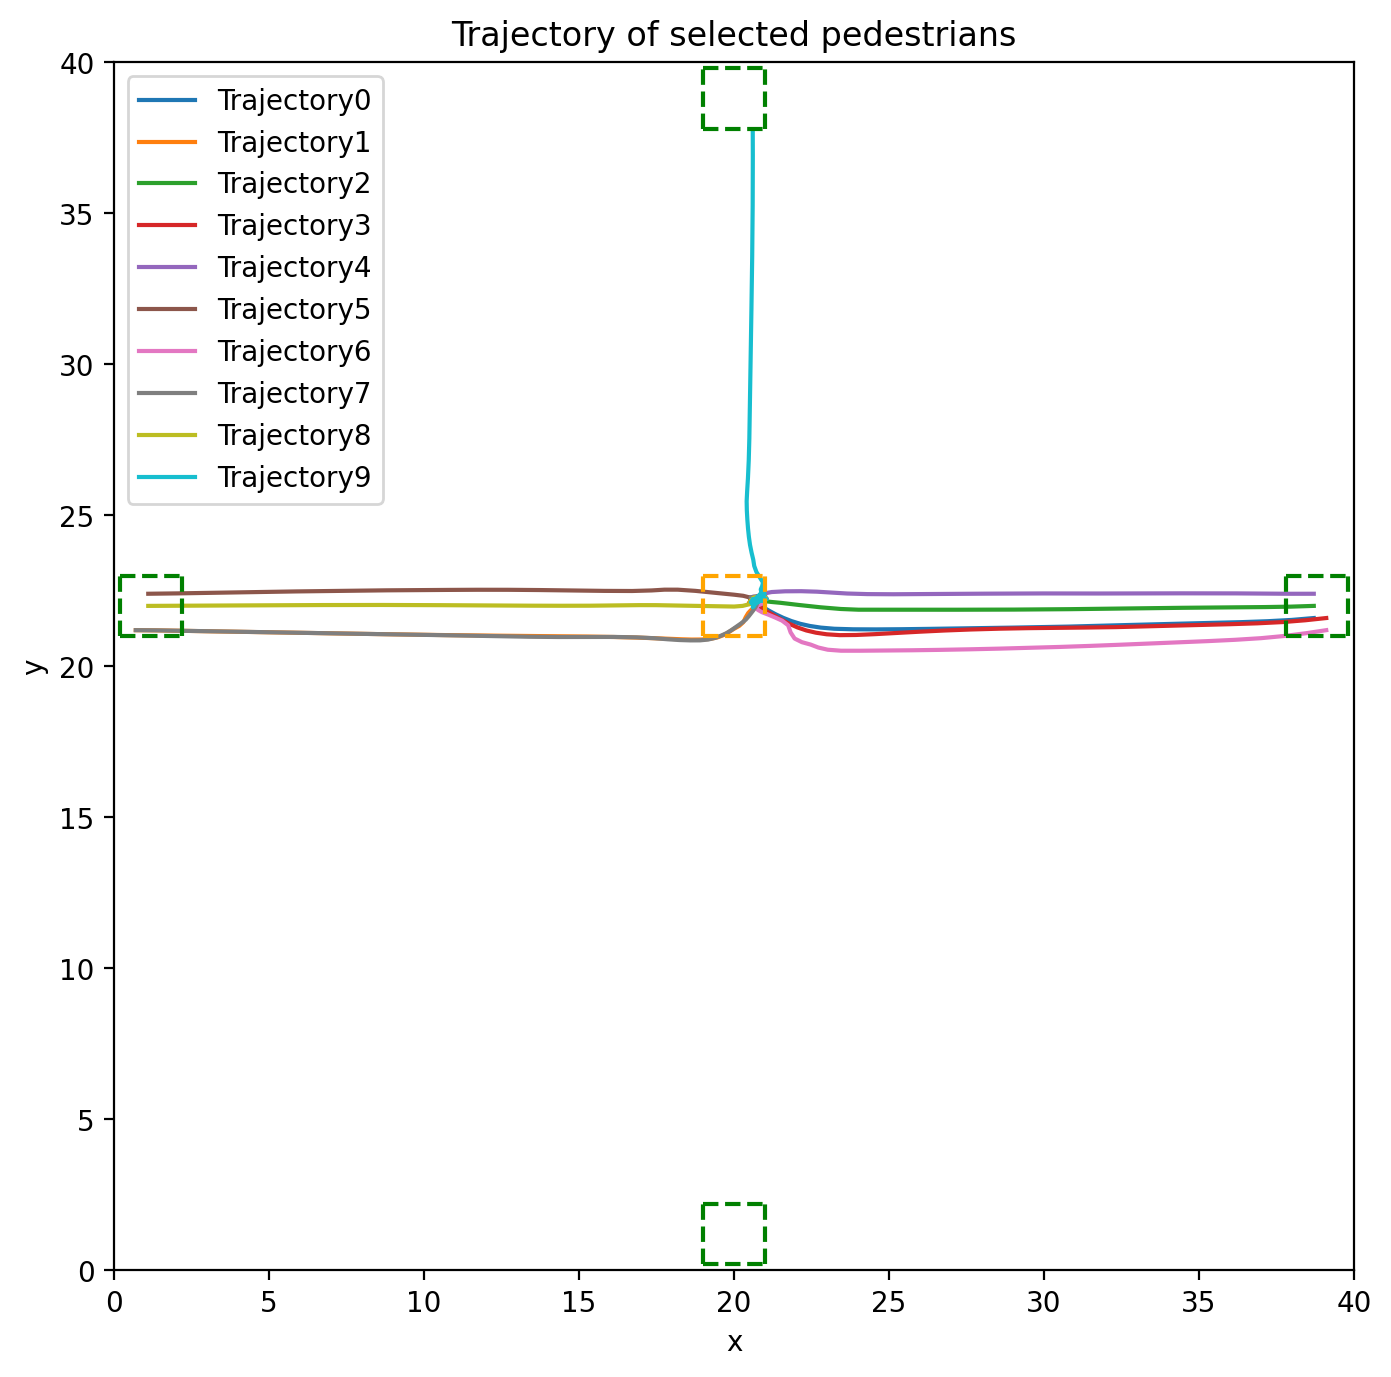

In [13]:
# simluate the trajectory
T_end = 335
num_selected_peds = 10
highest_num_ped = 20
traj = simulateRandomKutta(num_selected_peds, highest_num_ped, T_end, model, file_path)
plot_traj(num_selected_peds, traj, background="4directions")

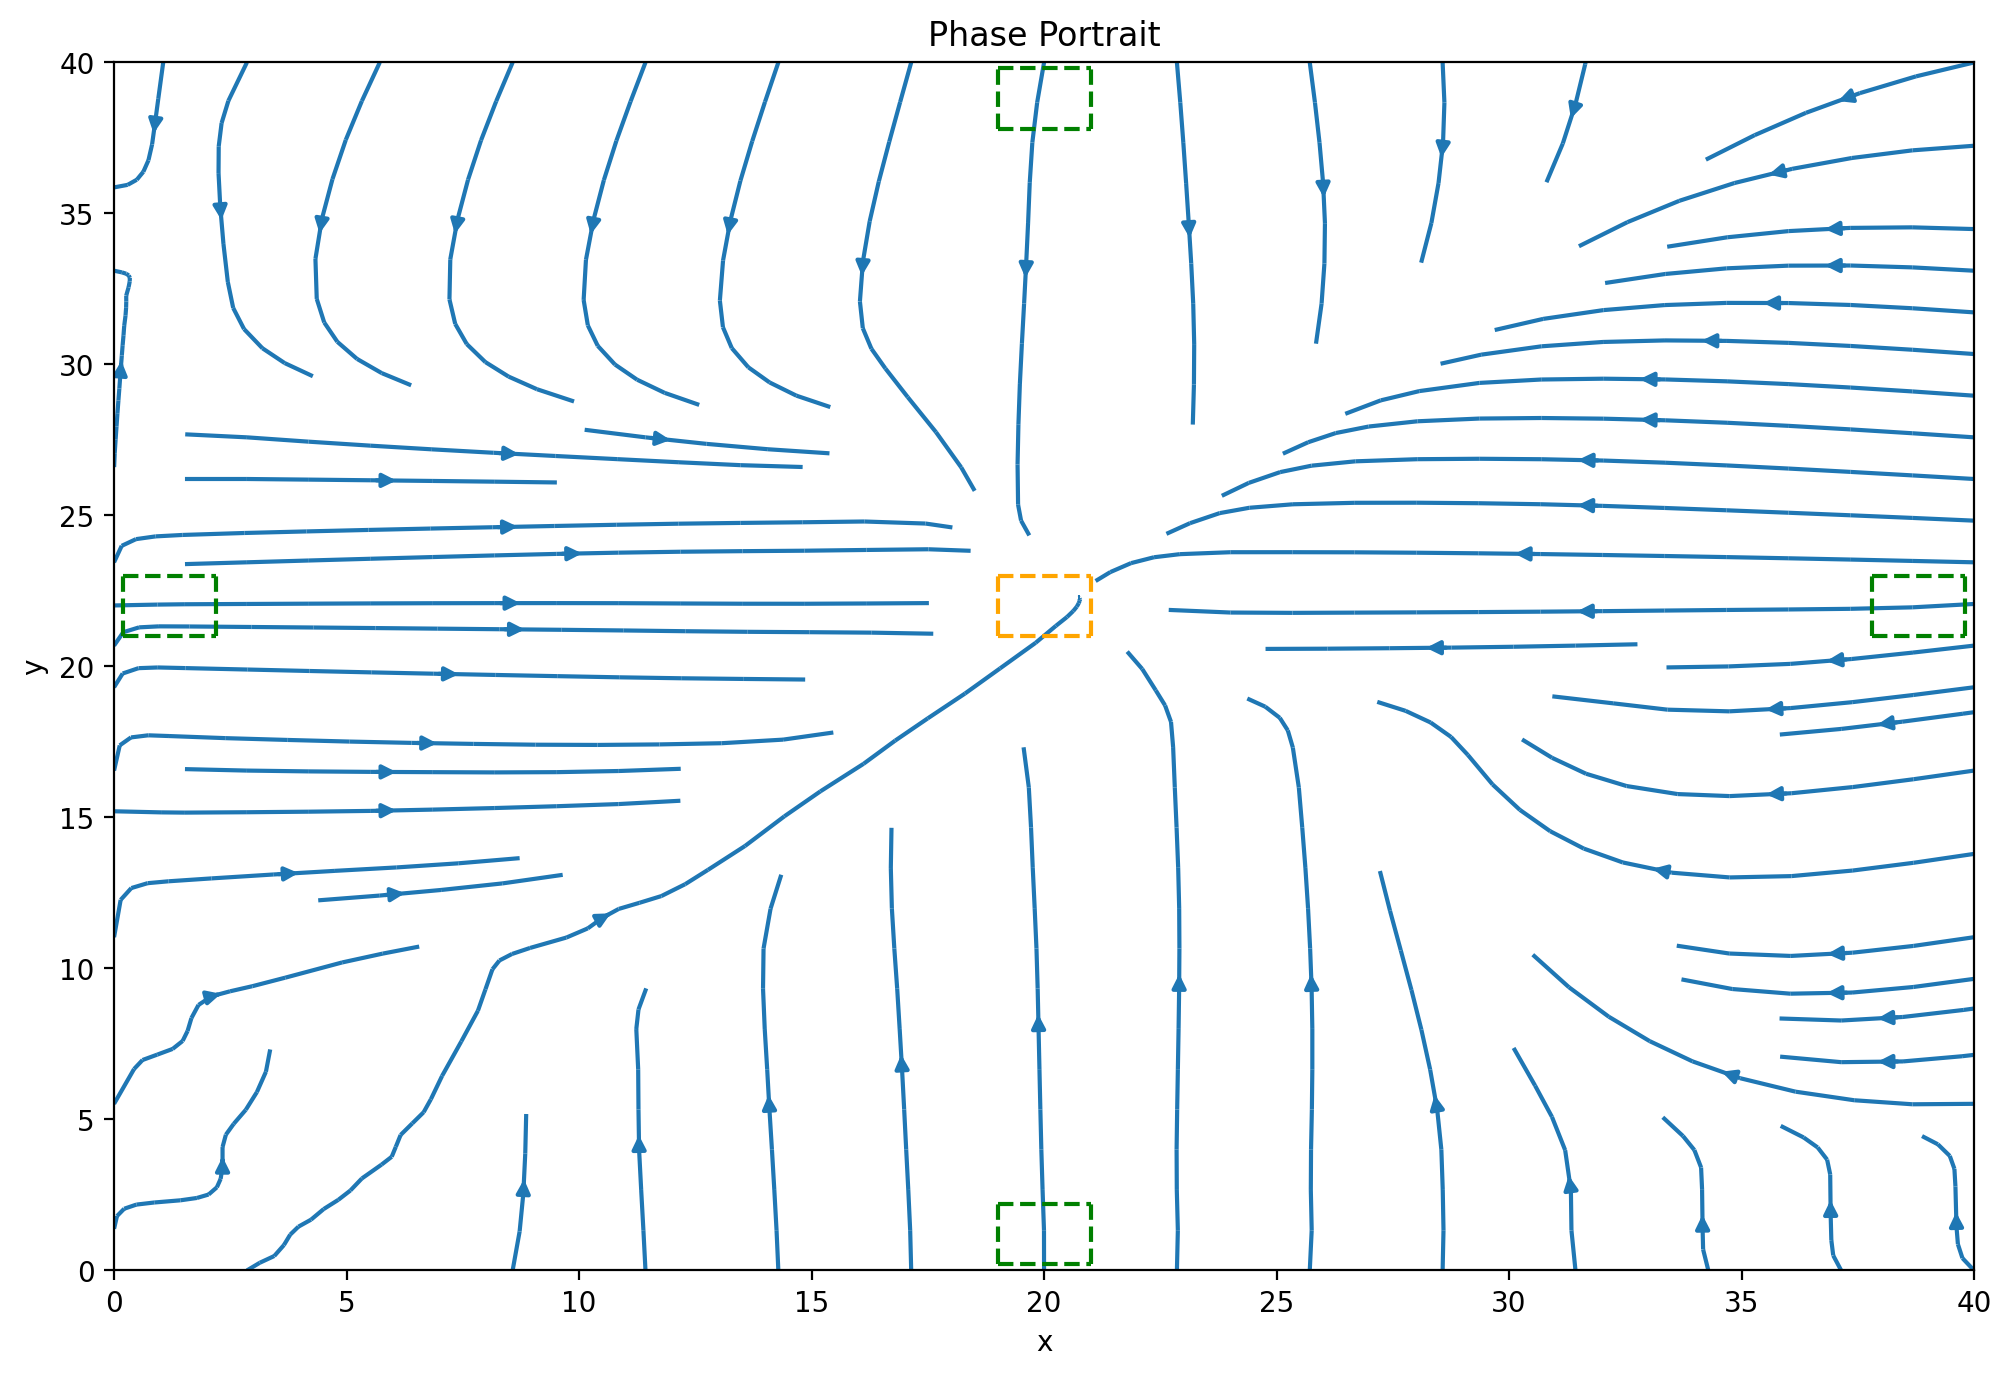

In [14]:
# plot the phase portrait
X, Y, U, V = phase_portrait(model)
plot_phase_portrait(X, Y, U, V, background="4directions")